In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def tektronixToDict(c):
  d = {}
  d[c[0][0] + b' ' + c[0][2]] = int(c[0][1])
  d[c[1][0] + b' ' + c[0][2]] = float(c[1][1])
  d[c[2][0] + b' ' + c[0][2]] = float(c[2][1])
  d[c[2][0] + b' ' + c[0][2]] = float(c[2][1])
  d[c[8][0] + b' ' + c[7][1]] = float(c[8][1])
  d[c[11][0] + b' ' + c[10][1]] = float(c[11][1])
  d['date'] = c[16][1]
  d['time'] = []
  d['data'] = []
  for i in c:
    d['time'].append(float(i[3]) - float(c[0][3]))
    d['data'].append(float(i[4]) * 50 / 0.7)
    
  d['time'] = np.array(d['time'])
  d['data'] = np.array(d['data'])
  return d

In [117]:
c = np.loadtxt('logs/short_receive.csv', delimiter=',', skiprows=0, dtype={'names': ('col1', 'col2', 'col3', 'time', 'val'),'formats': ('S99', 'S99', 'S99', 'S99', 'S99')})

d = tektronixToDict(c)
print(d)

{b'Record Length Points': 2500, b'Sample Interval Points': 0.00019999999495, b'Trigger Point Points': 660.000013097, b'Vertical Scale Volts': 0.20478123589, b'Horizontal Scale s': 0.04999999874, 'date': b'TDS 2001C - 1:26:20 AM   2019/06/09', 'time': array([0.00000000e+00, 2.00003400e-04, 4.00006800e-04, ...,
       4.99399990e-01, 4.99599993e-01, 4.99799997e-01]), 'data': array([1.14285706, 0.57142853, 0.57142853, ..., 0.57142853, 1.14285706,
       0.57142853])}


In [118]:
d['data']

array([1.14285706, 0.57142853, 0.57142853, ..., 0.57142853, 1.14285706,
       0.57142853])

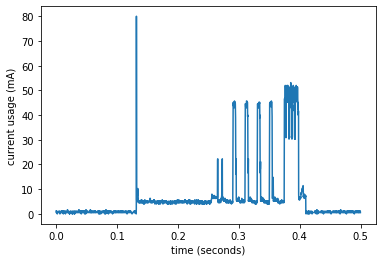

In [119]:
plt.plot(d['time'], d['data'])
plt.ylabel('current usage (mA)')
plt.xlabel('time (seconds)')
plt.show()

In [120]:
dt = d['time'][1:] - d['time'][:-1]

In [126]:
p = d['data'][:-1] * dt
sum(p)

3.3285706736526772

In [112]:
for t, d in zip(dt, d['data']):
    print(t, d)

0.0002000034000000095 1.1428570642857143
0.00020000339999998173 0.5714285320714285
0.00019998850000002566 0.5714285320714285
0.00020000339999998173 0.5714285320714285
0.00020000330000000122 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.0001999884999999979 1.1428570642857143
0.0002000034000000095 1.1428570642857143
0.00020000339999998173 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.0001999884999999979 0.0
0.00020000330000000122 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.00020000339999998173 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.0001999884999999979 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.00020000339999998173 0.5714285320714285
0.00020000330000000122 0.5714285320714285
0.0001999884999999979 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.0002000034000000095 0.5714285320714285
0.00020000339999998173 0.5714285320714285
0.0002000034000000095 1.1428570642857143
0.0001999883999999896